# HF Skew

# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in Data

In [2]:
df_raw = pd.read_parquet("hf_indices.parquet")

Let's look at how much data there is

In [3]:
(df_raw.dropna().drop(
    columns = ["field", "date"]).
    groupby("ticker").
    agg("count").
    sort_values("value"))

,value
ticker,
HFRXCLCH Index,89
HFRXCLET Index,89
HFRXEMNF Index,184
HFRXDSFS Index,184
HFRXCAFS Index,184
...,...
HFRXM Index,5113
HFRXMA Index,5113
HFRXRVA Index,5113


Let's prep the data

In [4]:
df_prep = (df_raw.drop(
    columns = ["field"]).
    dropna().
    assign(
        ticker = lambda x: x.ticker.str.split(" ").str[0],
        date = lambda x: pd.to_datetime(x.date)))

# Skew of Monthly Returns

In [5]:
df_skew = (df_prep.pivot(
    index = "date", columns = "ticker", values = "value").
    pct_change().
    reset_index().
    melt(id_vars = "date").
    dropna().
    drop(columns = ["date"]).
    groupby("ticker").
    agg("skew").
    sort_values("value"))

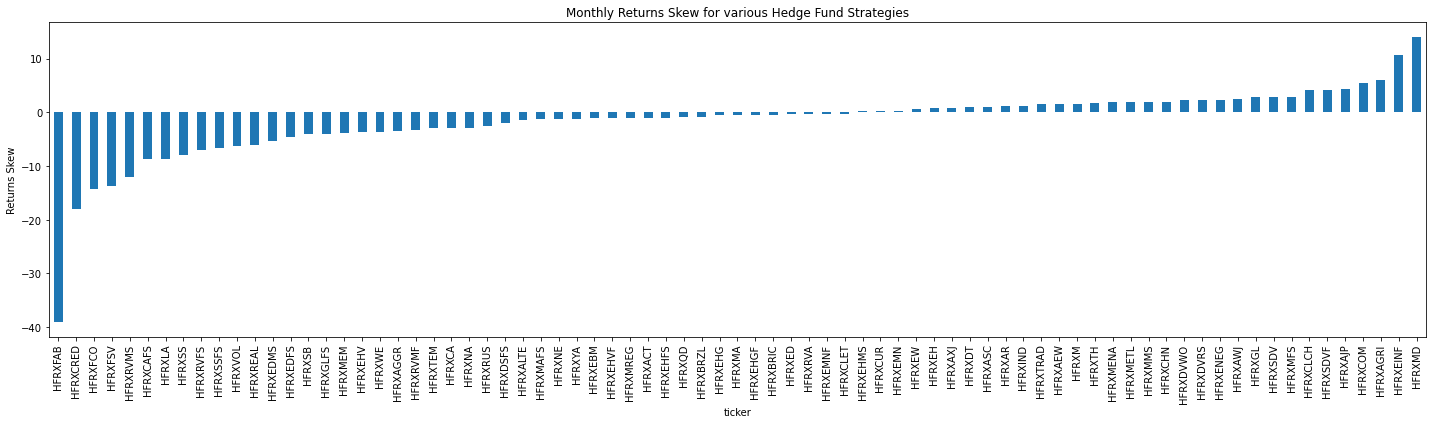

In [6]:
df_skew.plot(
    kind = "bar",
    figsize = (20, 6),
    legend = False,
    ylabel = "Returns Skew",
    title = "Monthly Returns Skew for various Hedge Fund Strategies")

plt.tight_layout()
plt.show()